# Importing important Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D, Dense,Flatten, Dropout
from tensorflow.keras.models import Sequential

# Load the fashion Mnist data from keras datsets in form of tuple of training and test set data

### After loading we normalize the images and change the dimensions i.e add channels in image

In [2]:
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("shape of training data is", X_train.shape)

# Normalize the images
X_train = X_train/255.0
X_test = X_test/255.0

# make the dimensions suitable for CNN
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test, -1)

# make the dimensions suitable for CNN
y_train = y_train.flatten()
y_test = y_test.flatten()

print('New dimensions of training data is', X_train.shape)

shape of training data is (60000, 28, 28)
New dimensions of training data is (60000, 28, 28, 1)


# Creating CNN model
### We use Conv2D with 32 filters and stride of 2 inplace of maxpooling layer with relu activation
### We use Conv2D with 64 filters and stride of 2 inplace of maxpooling layer with relu activation
### We use Conv2D with 128 filters and stride of 2 inplace of maxpooling layer with relu activation
### We flatten the Conv2D layers using Flatten layer and place a Dropout layer with 0.2
### We add Dense layer with 128 neurons and relu activation accompanied by a Dropout Layer with 0.2
### Finally we add an output layer with 10 neurons (no of classes) with softmax activation
### We use Adam as optimizer, sparse_categorical_crossentropy as loss and accuracy as metrics

In [4]:
model = Sequential([
        Conv2D(32, (3,3), strides = 2, activation = 'relu', input_shape = (X_train[0].shape)),
        Conv2D(64, (3,3), strides = 2, activation = 'relu'),
        Conv2D(128, (3,3), strides = 2, activation = 'relu'),
        Flatten(),
        Dropout(0.2),
        Dense(128, activation = 'relu'),
        Dropout(0.2),
        Dense(10, activation = 'softmax')    
        ])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Augmentation of training data
### We use ImageDataGenerator of keras to preprocess the images i.e. augmentation
### The augmentation helps to avoid overfitting and the model generalizes better
### The following are added as parameter of augementation
### i. rotation range in degress
### ii. Zoom range
### iii. width shift 
### iv. horizontal flip

In [5]:
# data augmention step
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            rotation_range = 10,
            zoom_range = 0.1,
            width_shift_range = 0.1,
            height_shift_range = 0.1,
            horizontal_flip = True,
            )

# Once the datagenerator is created we make the flow 
### Make the flow using training data i.e it creates augmented images on the go so no need to save it in the memory
### Steps per epoch is calculated by dividing total samples by the required batch size. This parameter is used in training the model

In [6]:
# generator and compiling
batch_size = 32
training_generator = datagen.flow(X_train, y_train, batch_size = batch_size)
steps_per_epoch = X_train.shape[0]//batch_size

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

# Fitting the model
### We use the flow created using ImageDataGenerator to train the model

In [8]:
r = model.fit(training_generator,
              validation_data = (X_test, y_test),
              steps_per_epoch = steps_per_epoch,
              epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 18s 10ms/step - loss: 1.0381 - accuracy: 0.6148 - val_loss: 0.5403 - val_accuracy: 0.7906
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6428 - accuracy: 0.7561 - val_loss: 0.4813 - val_accuracy: 0.8144
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5761 - accuracy: 0.7800 - val_loss: 0.4636 - val_accuracy: 0.8176
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5297 - accuracy: 0.7994 - val_loss: 0.4329 - val_accuracy: 0.8339
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5080 - accuracy: 0.8079 - val_loss: 0.4143 - val_accuracy: 0.8472
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4919 - accuracy: 0.8130 - val_loss: 0.3955 - val_accuracy: 0.8499
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4680 - accuracy: 0.8217 - val_loss: 0.3967 - val_a

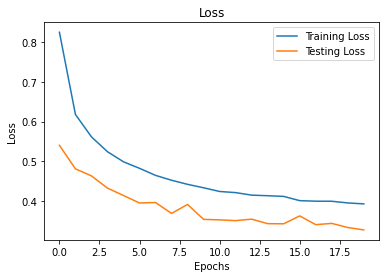

In [9]:
plt.plot(r.history['loss'], label = 'Training Loss')
plt.plot(r.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend();

# Plotting the history
### We can see from both graphs that augmentation helps avoid overfitting 

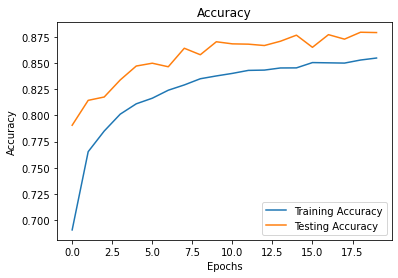

In [10]:
plt.plot(r.history['accuracy'], label = 'Training Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend();